
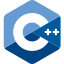
<br>

<div style="text-align:center; font-size:200%;">
  <b>SRP Workshop</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 08 SRP Workshop.ipynb -->
<!-- slides/module_500_solid_grasp/topic_310_workshop_srp.cpp -->


## Recap: Single Responsibility Principle (SRP, SOLID)

- A module should have one, and only one, reason to change
- Alternately: A module should be responsible to one, and only one, actor


## Resolution Strategies

<div>
<img src="img/book_resolution_1_srp.svg"
     style="float:left;padding:5px;width:40%"/>
<img src="img/book_resolution_2_srp.svg"
     style="float:right;padding:5px;width:50%"/>
</div>


<img src="img/book_resolution_1.svg"
     style="display:block;margin:auto;width:100%"/>


<img src="img/book_resolution_2.svg"
     style="display:block;margin:auto;width:100%"/>


## Workshop: Weather App

Imagine a versatile weather application called WeatherWise. WeatherWise
provides its users with up-to-date weather information sourced from various
online platforms. Beyond just showing current conditions, the app allows
users to view the forecast in different visual formats, and it logs errors
for any issues during data fetch or parsing.

While WeatherWise is well-received for its features, the development team
faces challenges maintaining and extending the application. Developers have
noticed that the core class, `Weather`, is becoming increasingly complex. It
handles everything from data fetching to data display. This complexity makes
it challenging to introduce new features without risking the introduction of
bugs.

Your task: Refactor the `Weather` class, ensuring that each class in the
system adheres to the Single Responsibility Principle. By doing so, you'll
set the foundation for a more maintainable and scalable application.


### Weather App Class Diagram

<img src="img/weather_app_class.svg"
     style="display:block;margin:auto;width:40%"/>


### RunWeatherApp() Sequence Diagram

<img src="img/weather_app_sequence.svg"
     style="display:block;margin:auto;width:30%"/>

In [ ]:
#include <iostream>
#include <sstream>
#include <string>
#include <vector>

In [ ]:
class Weather
{
public:
    void FetchDataFromSource();
    void ParseData();
    void DisplayInFormatA();
    void DisplayInFormatB();
    void LogError(const std::string& errorMsg);
    std::string FormatData() const;

private:
    std::string rawData_;
    std::vector<double> data_;
};

In [ ]:
void Weather::FetchDataFromSource()
{
    // Simulating fetching data from some source
    rawData_ = "Sunny, 25°C";
    std::cout << "Data fetched from source.\n";
}

In [ ]:
void Weather::ParseData()
{
    // Simulate data parsing
    if (rawData_.empty()) {
        LogError("No data available");
        return;
    }
    data_ = {10.0, 12.0, 8.0, 15.0, 20.0, 22.0, 25.0};
    std::cout << "Data parsed: " << FormatData() << "\n";
}

In [ ]:
void Weather::DisplayInFormatA()
{
    // Simulating one display format
    if (data_.empty()) {
        LogError("No data available");
        return;
    }
    std::cout << "Format A: " << FormatData() << "\n";
}

In [ ]:
void Weather::DisplayInFormatB()
{
    // Simulating another display format
    if (data_.empty()) {
        LogError("No data available");
        return;
    }
    std::cout << "Format B: === " << FormatData() << " ===\n";
}

In [ ]:
void Weather::LogError(const std::string& errorMsg)
{
    // Simulating error logging
    std::cout << "Error: " << errorMsg << "\n";
}

In [ ]:
std::string Weather::FormatData() const
{
    std::ostringstream stream;
    std::copy(
        data_.begin(), data_.end(), std::ostream_iterator<double>(stream, ", "));
    return stream.str();
}

In [ ]:
void RunWeatherApp(bool introduceError = false)
{
    Weather w;
    w.FetchDataFromSource();
    if (!introduceError) {
        w.ParseData();
    }
    w.DisplayInFormatA();
    w.DisplayInFormatB();
}

In [ ]:
RunWeatherApp();

In [ ]:
RunWeatherApp(true);